<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# COVID-19 landscape

...Intro COVID...

With the goal to reassess the situation regarding the number of cases and deaths ocurring in Brazil and also worldwide, in this notebook I will analyse recent data from [Our World in Data](https://ourworldindata.org/) regarding COVID-19 infections/vaccination globally. Later on, I will analyse data specific to Brazil.

### Importing necessary packages

In [1]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import tools

# autoreload external tools.py file
%load_ext autoreload
%autoreload 2

# getting plots to work in ipynb
%matplotlib inline

# defining plot parameters
#plt.style.use('dark_background')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'

## Getting the data

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Variables codebook

The description of each variable was obtained from the [dataset codebook](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv), as provided by Our World in Data. 

In this notebook, only the variables below will be used:

| Variable | Description |
|:-:|:-:|
| `iso_code` | The ISO 3166-1 alpha 3 codes representing the country names|
| `continent` | Continent of the geographical location|
| `location` | Geographical location. This variable also contains classification based on country income or entire continents|
| `date` | Data of the observation|
| `total_cases` | Total number of confirmed cases up until the date specified. Can include probable cases, where reported|
| `new_cases` | New confirmed cases. Can include probable cases, where reported. Negative values are replaced with NAs when the input was subject to data corretion|
| `new_cases_smoothed` | Same as above, 7-day smoothed|
| `total_deaths` | Total deaths attributed to COVID-19. Can include probable deaths, where reported|
| `new_deaths` | New deaths attributed to COVID-19. Can include probable deaths, where reported. Negative values are replaced with NAs when the input was subject to data corretion|
| `new_deaths_smoothed` | Same as above, 7-day smoothed|
| `total_cases_per_million` | Total cases per 1,000,000 people| Can include probable cases, where reported|
| `new_cases_per_million` | New confirmed cases per 1,000,000 people. Can include probable cases, where reported|
| `new_cases_smoothed_per_million` | Same as above, 7-day smoothed|
| `total_deaths_per_million` | Total deaths attributed to COVID-19 per 1,000,000 people. Can include probable deaths, where reported|
| `new_deaths_per_million` | New deaths attributed to COVID-19 per 1,000,000 people. Can include probable deaths, where reported|
| `new_deaths_smoothed_per_million` | Same as above, 7-day smoothed|
| `total_tests` | Total tests for COVID-19 |
| `total_vaccinations` | Total number of vaccination doses administered|
| `people_vaccinated` | Total number of people with at least one dose of the vaccine|
| `people_fully_vaccinated` | Total number of people with all doses as per the initial vaccination protocol|
| `total_boosters` | Total number of booster doses administered (beyond the initial protocol)|
| `new_vaccinations` | New doses administered|
| `new_vaccinations_smoothed` | Sabe as amove, 7-day smoothed (assuming vaccination changed equally for countries that did not report daily)|
| `total_vaccinations_per_hundred` | Total number of doses administered per 100 people in the total population|
| `people_vaccinated_per_hundred` | Total number of people vaccinated with at least one dose per 100 people|
| `people_fully_vaccinated_per_hundred` | Total number of people with all doses (based on the initial protocol) per 100 people|
| `total_boosters_per_hundred` | Total number of vaccine boosters administered per 100 people|
| `new_vaccinations_smoothed_per_million` | New vaccines administered, 7-day smoothed, per 1,000,000 people|
| `new_people_vaccinated_smoothed` | Daily number of people receiving the first dose, 7-day smoothed|
| `new_people_vaccinated_smoothed_per_hundred` | Same as above, per 100 people|
| `gdp_per_capita` | Gross domestic product at purchasing power parity (constant 2011 international dollars), for the most recent available year|
| `human_development_index` | 2019 values of HDI, measuring average achievement in three basic dimensions of human develompment (long and healthy life, knowledge and decent standard of living)|
| `population` | Latest available population values|


### Importing COVID-19 data

The data used here was obtained from [*Our World in Data*](https://github.com/owid/covid-19-data/tree/master/public/data) on 21/03/2022. To begin, let's start by loading the referred dataset as a dataframe.

In [2]:
# importing dataset into a dataframe
df_full = pd.read_csv("./data/owid-covid-data.csv")


#  # getting all column names to describe variables above
# for column in df.columns:
#     print("* `{}` = " .format(column))

## Exploratory analysis

Let's start by looking at our dataset and its size.

In [3]:
# checking dataset entries
df_full.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# checking dataset size
df_full.shape

(169939, 67)

We can see that our dataset contains almost 170,000 observations. Parsing the date column and checking it:

In [5]:
# converting 'date' to datetime
df_full.date = pd.to_datetime(df_full.date)

# checking if it worked
df_full.date.dtype.type

numpy.datetime64

This dataset contains several variables that are not of interest at this moment. A dataframe subset will be created, based on the variables that are going to be used in this analysis (mentioned in the section above).

In [6]:
# defining columns of intereset
col_int = ['iso_code',
           'continent', 
           'location', 
           'date', 
           'total_cases', 
           'new_cases', 
           'new_cases_smoothed', 
           'total_deaths', 
           'new_deaths', 
           'new_deaths_smoothed',
           'total_cases_per_million',
           'new_cases_per_million',
           'new_cases_smoothed_per_million',
           'total_deaths_per_million',
           'new_deaths_per_million',
           'new_deaths_smoothed_per_million',
           'total_tests',
           'total_vaccinations',
           'people_vaccinated',
           'people_fully_vaccinated',
           'total_boosters',
           'new_vaccinations',
           'new_vaccinations_smoothed',
           'total_vaccinations_per_hundred',
           'people_vaccinated_per_hundred',
           'total_boosters_per_hundred',
           'new_vaccinations_smoothed_per_million',
           'new_people_vaccinated_smoothed',
           'new_people_vaccinated_smoothed_per_hundred',
           'gdp_per_capita',
           'human_development_index',
           'population'
           ]

df = df_full.filter(col_int)

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,gdp_per_capita,human_development_index,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,0.511,39835428.0


Checking if the variable types match their content:

In [7]:
# checking data types
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # to display more than the limit of rows in jupyter
    print(df.dtypes)

iso_code                                              object
continent                                             object
location                                              object
date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
new_cases_smoothed                                   float64
total_deaths                                         float64
new_deaths                                           float64
new_deaths_smoothed                                  float64
total_cases_per_million                              float64
new_cases_per_million                                float64
new_cases_smoothed_per_million                       float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
new_deaths_smoothed_per_million                      float64
total_tests             

The types of the variables make sense. Now, how many null values are present in the dataset?

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print((df.isnull().sum()/df.shape[0]).sort_values(ascending=False))

total_boosters_per_hundred                    0.890372
total_boosters                                0.890372
new_vaccinations                              0.774713
people_fully_vaccinated                       0.756171
people_vaccinated_per_hundred                 0.740301
people_vaccinated                             0.740301
total_vaccinations_per_hundred                0.727037
total_vaccinations                            0.727037
total_tests                                   0.587952
new_people_vaccinated_smoothed_per_hundred    0.487716
new_people_vaccinated_smoothed                0.487716
new_vaccinations_smoothed                     0.483014
new_vaccinations_smoothed_per_million         0.483014
human_development_index                       0.181530
gdp_per_capita                                0.167784
new_deaths_smoothed_per_million               0.141521
new_deaths_smoothed                           0.137084
total_deaths_per_million                      0.129188
new_deaths

Most of the variables have missing values, except for `date`, `location` and `iso_code`. The absence of such data can be explained by the fact that different variables probably started to be recorded at different timepoints in different locations since the pandemic started. This is best exemplified by the vaccination data, since we know how much the vaccine availability was delayed in some countries (such as Brazil). Therefore, it is not wise to remove these missing values, because they serve as a waystone to when the recording of such data began.

Before proceeding, let's check what is the most recent date recorded on the dataset.

In [9]:
# what is the most recent date in the dataset
df.date.sort_values(ascending=False)[0:1]

169938   2022-03-20
Name: date, dtype: datetime64[ns]

## Analysing COVID-19 data

The COVID-19 pandemic certainly changed everyone's lives. Here, we will take a look at the evolution of the disease in the world. We will observe the pandemic in a few aspects: how it evolved around the world, in different continents and countries. We also take a special look at data regarding the infections in Brazil.

First, let's separate data regarding the situation worldwide:

In [10]:
# Separating dataframe
df_world = df.loc[df.location == 'World']

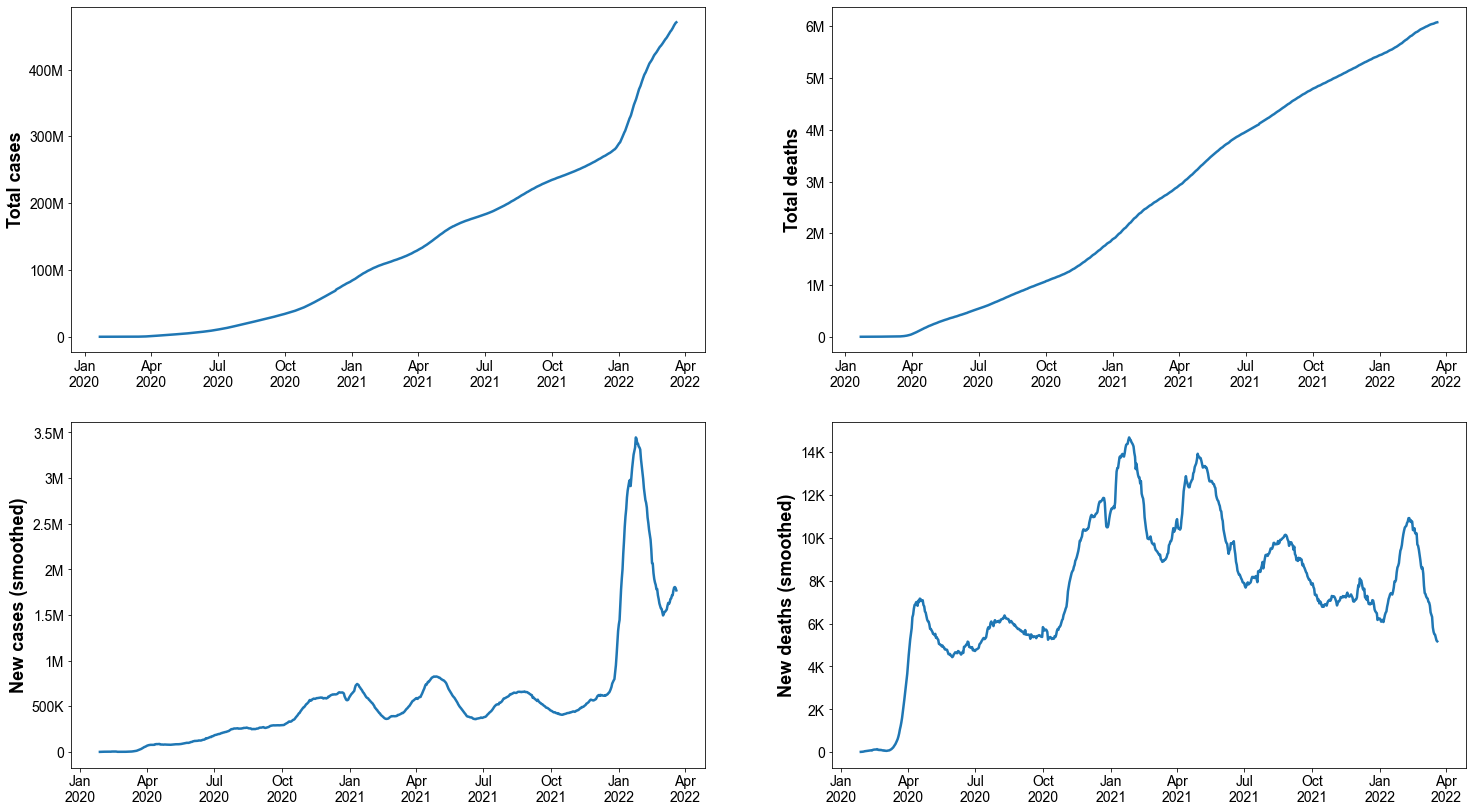

In [11]:
# Plotting line plots
fig, ax = plt.subplots(2, 2, figsize=(25,14))

fig.patch.set_alpha(0)

sns.lineplot(data=df_world, x='date', y='total_cases', linewidth=2.5, ax=ax[0,0]);
ax[0,0].set_xlabel('')
ax[0,0].tick_params('both', labelsize=14)
ax[0,0].set_ylabel('Total cases', weight='bold', fontsize=18)
ax[0,0].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[0,0].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

sns.lineplot(data=df_world, x='date', y='total_deaths', linewidth=2.5, ax=ax[0,1]);
ax[0,1].set_xlabel('')
ax[0,1].tick_params('both', labelsize=14)
ax[0,1].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[0,1].set_ylabel('Total deaths', weight='bold', fontsize=18)
ax[0,1].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

sns.lineplot(data=df_world, x='date', y='new_cases_smoothed', linewidth=2.5, ax=ax[1,0]);
ax[1,0].set_xlabel('')
ax[1,0].tick_params('both', labelsize=14)
ax[1,0].set_ylabel('New cases (smoothed)', weight='bold', fontsize=18)
ax[1,0].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[1,0].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

sns.lineplot(data=df_world, x='date', y='new_deaths_smoothed', linewidth=2.5, ax=ax[1,1]);
ax[1,1].set_xlabel('')
ax[1,1].tick_params('both', labelsize=14)
ax[1,1].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[1,1].set_ylabel('New deaths (smoothed)', weight='bold', fontsize=18)
ax[1,1].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

plt.savefig("plots/lineplot_world.png", transparent=True)

It is easy to see how much the number of cases and death have increase since the beginning of the pandemic. However, none of the peaks of new cases come close to the beginning of 2022, that is when the Omicron variant started spreading, which is [known to spread more easily](https://www.cdc.gov/coronavirus/2019-ncov/variants/omicron-variant.html#:~:text=The%20Omicron%20variant%20spreads%20more,spread%20the%20virus%20to%20others.) than the other variants. We can also see that there are peaks in new cases that preceed the Omicron variant. As one can expect, these peaks also happen concurrently with the peaks in new deaths (Jan-Feb/2021, May-Jun/2021, Aug-Sep/2021).

Following the analysis, when we look at the `location` and `iso_code` variables, it is possible to see that there are entries in the dataset that do not correspond to countries. Instead, these entries refer to other ways in which the data is stored in the dataset: values grouped by **continent** and **country income** (Classifications made by [The World Bank](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups). The details about each category are available [here](https://github.com/owid/covid-19-data/blob/master/scripts/input/wb/income_groups.csv)).

### Extracting the data

We begin by extracting the data:

In [12]:
# subsetting data that represent world/continents/classes
df_owid = df.loc[df.iso_code.str.startswith('OWID_')]

# checking all observations that match and counting how many entries
df_owid[['iso_code', 'location']].value_counts()


iso_code  location           
OWID_ASI  Asia                   789
OWID_HIC  High income            789
OWID_LMC  Lower middle income    789
OWID_NAM  North America          789
OWID_UMC  Upper middle income    789
OWID_WRL  World                  789
OWID_EUN  European Union         788
OWID_EUR  Europe                 788
OWID_OCE  Oceania                786
OWID_INT  International          773
OWID_AFR  Africa                 767
OWID_SAM  South America          758
OWID_LIC  Low income             757
OWID_KOS  Kosovo                 737
OWID_CYN  Northern Cyprus        317
dtype: int64

The dataset lacks information about the *Internationl* classification, so we will ignore it for now. But there are two values that should be included as countries for our analysis: *Kosovo* and *Northern Cyprus*. Thus, we will keep them in our main dataframe:

In [13]:
# dropping international values
df_owid = df_owid[df_owid.location != 'International']

# checking all observations that match and counting how many entries
df_owid[['iso_code', 'location']].value_counts()

iso_code  location           
OWID_ASI  Asia                   789
OWID_HIC  High income            789
OWID_LMC  Lower middle income    789
OWID_NAM  North America          789
OWID_UMC  Upper middle income    789
OWID_WRL  World                  789
OWID_EUN  European Union         788
OWID_EUR  Europe                 788
OWID_OCE  Oceania                786
OWID_AFR  Africa                 767
OWID_SAM  South America          758
OWID_LIC  Low income             757
OWID_KOS  Kosovo                 737
OWID_CYN  Northern Cyprus        317
dtype: int64

In [14]:
# removing other classifications from the main dataframe
df = df.loc[~df.iso_code.str.match('^OWID_(?!KOS|CYN)')]

# checking
df.loc[df.iso_code.str.startswith('OWID_')][['iso_code', 'location']].value_counts()

iso_code  location       
OWID_KOS  Kosovo             737
OWID_CYN  Northern Cyprus    317
dtype: int64

Now, we create two separate dataframes, one for income-based data and the other for data regarding the continents and the World:

In [15]:
# creating lists
income_list = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
continent_list = ['Asia', 'Europe', 'Oceania', 'Africa', 'South America', 'North America']

# separating income-based data
df_income = df_owid.loc[df_owid.location.isin(income_list)]

# separating continent based data
df_continent = df_owid.loc[df_owid.location.isin(continent_list)]

### COVID-19 by Continents

We will start by looking at the data from the **continent** point of view. Thus, we separate the data from the most recent entry in the dataset.

In [16]:
# Extracting and ordering by most deaths
top5MostDeaths_continent = df_continent.loc[df_continent.date == '2022-03-20'].sort_values(by='total_deaths', ascending=False)

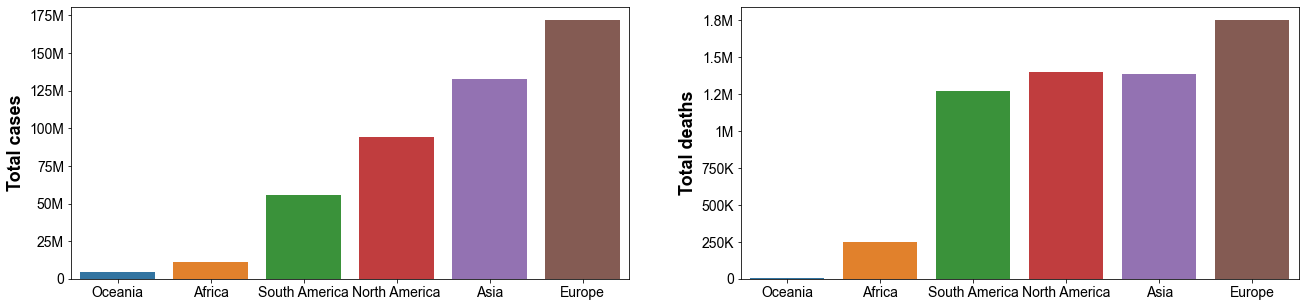

In [17]:
# Creating barplots
fig, ax = plt.subplots(1, 2, figsize=(22,5))

fig.patch.set_alpha(0)

sns.barplot(data=top5MostDeaths_continent, x='location', y='total_cases', ax=ax[0], order=['Oceania','Africa','South America','North America', 'Asia', 'Europe'])
ax[0].set_xlabel('')
ax[0].tick_params('both', labelsize=14)
ax[0].set_ylabel('Total cases', weight='bold', fontsize=18)
ax[0].yaxis.set_major_formatter(tools.reformat_large_tick_values);

sns.barplot(data=top5MostDeaths_continent, x='location', y='total_deaths', ax=ax[1], order=['Oceania','Africa','South America','North America', 'Asia', 'Europe'])
ax[1].set_xlabel('')
ax[1].tick_params('both', labelsize=14)
ax[1].set_ylabel('Total deaths', weight='bold', fontsize=18)
ax[1].yaxis.set_major_formatter(tools.reformat_large_tick_values);

plt.savefig("plots/total_cases_deaths_continent.png", transparent=True)

Overall, the total number of deaths and cases was higher in **Europe**, followed by **North America** (deaths) and **Asia** (cases). This, however, could be partially explained by the higher availability of testing in these continents, especially in countries with higher income. This is likely to also be true for data regarding new cases:

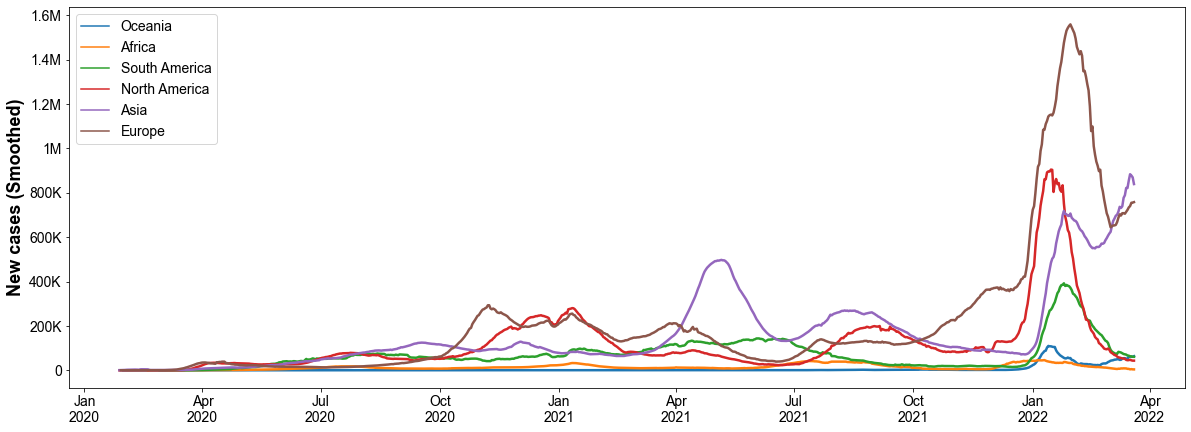

In [18]:
# Plotting lineplot
fig, ax = plt.subplots(figsize=(20,7))

fig.patch.set_alpha(0)

sns.lineplot(data=df_continent, x='date', y='new_cases_smoothed', hue='location', linewidth=2.5, ax=ax, hue_order=['Oceania','Africa','South America','North America', 'Asia', 'Europe']);
ax.set_xlabel('')
ax.tick_params('both', labelsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('New cases (Smoothed)', weight='bold', fontsize=18);
ax.yaxis.set_major_formatter(tools.reformat_large_tick_values);
ax.xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

plt.savefig("plots/lineplot_newCasesSmoothed_continent.png", transparent=True)

When we look at the new cases confirmed, using the smoothed values, a sharp increase in the number of new reported cases in January 2022 is noticed. This is consistend with the Omicron variant, which spread with alarming rates when it emerged.

### COVID-19 by Income

Now, checking the data based on the income of the countries.

In [19]:
# Extracting and ordering by most deaths
top5MostDeaths_income = df_income.loc[df_income.date == "2022-03-20"].sort_values(by="total_deaths", ascending=False)

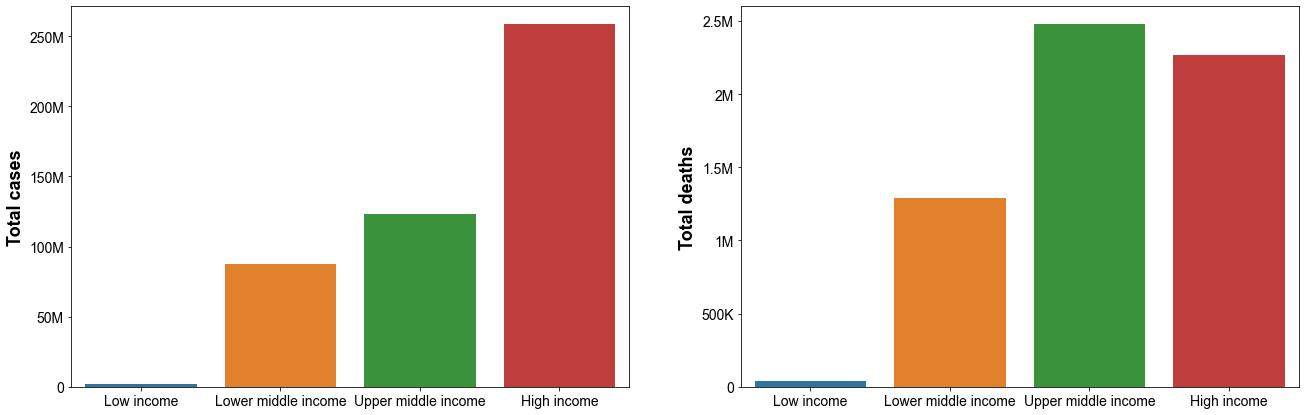

In [20]:
# Creating barplots
fig, ax = plt.subplots(1, 2, figsize=(22,7))

fig.patch.set_alpha(0)

sns.barplot(data=top5MostDeaths_income, x='location', y='total_cases', ax=ax[0], order=['Low income', 'Lower middle income', 'Upper middle income', 'High income'])
ax[0].set_xlabel('')
ax[0].tick_params('both', labelsize=14)
ax[0].set_ylabel('Total cases', weight='bold', fontsize=18)
ax[0].yaxis.set_major_formatter(tools.reformat_large_tick_values);

sns.barplot(data=top5MostDeaths_income, x='location', y='total_deaths', ax=ax[1], order=['Low income', 'Lower middle income', 'Upper middle income', 'High income'])
ax[1].set_xlabel('')
ax[1].tick_params('both', labelsize=14)
ax[1].set_ylabel('Total deaths', weight='bold', fontsize=18)
ax[1].yaxis.set_major_formatter(tools.reformat_large_tick_values);

plt.savefig("plots/total_cases_deaths_income.png", transparent=True)

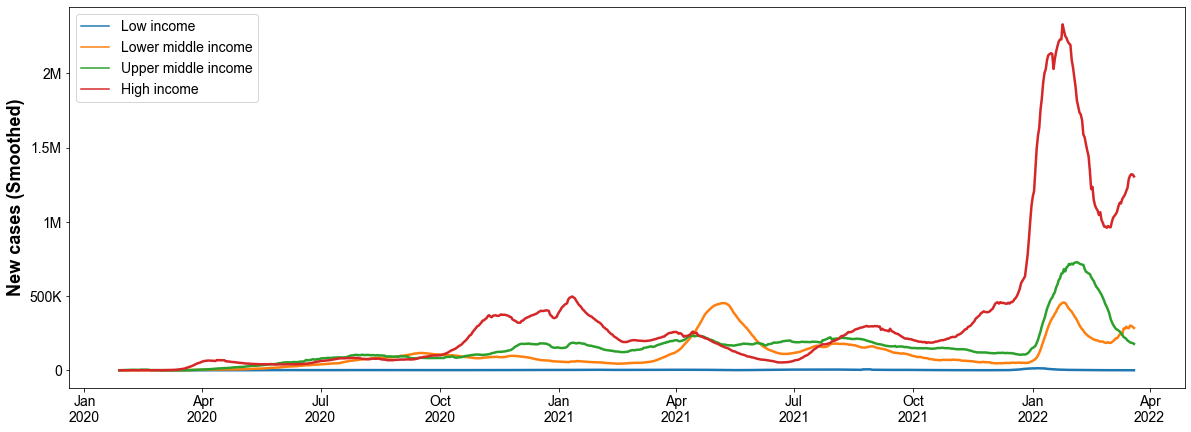

In [21]:
# Creating line plot of new cases
fig, ax = plt.subplots(figsize=(20,7))

fig.patch.set_alpha(0)

sns.lineplot(data=df_income, x='date', y='new_cases_smoothed', hue='location', linewidth=2.5, ax=ax, hue_order=['Low income', 'Lower middle income', 'Upper middle income', 'High income']);
ax.set_xlabel('')
ax.tick_params('both', labelsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('New cases (Smoothed)', weight='bold', fontsize=18)
ax.yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax.xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

plt.savefig("plots/lineplot_newCasesSmoothed_income.png", transparent=True)

From these plots, we can see that **High income** countries dominate in total and new cases, while the total deaths is higher in **Upper middle income** countries.

### Analysing COVID-19 by Country

First, let's see which 5 countries dominate the dataset regarding most deaths and most cases.

In [22]:
# 5 countries with most deaths up until 2022-03-20
top5MostDeaths_countries = df.loc[df.date == "2022-03-20"].sort_values(by="total_deaths", ascending=False).head(5)

# 5 countries with most cases up until 2022-03-20
top5MostCases_countries = df.loc[df.date == "2022-03-20"].sort_values(by="total_cases", ascending=False).head(5)

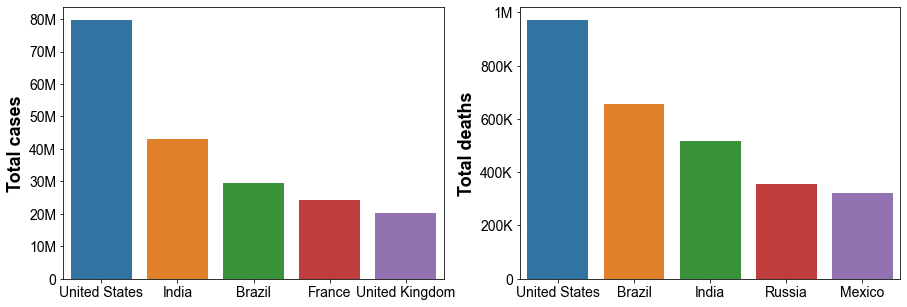

In [23]:
# plotting bar plot of top5 most deaths and cases
fig, ax = plt.subplots(1, 2, figsize=(15,5))

fig.patch.set_alpha(0)

sns.barplot(data=top5MostCases_countries, x='location', y='total_cases', ax=ax[0])
ax[0].set_xlabel('')
ax[0].tick_params('both', labelsize=14)
ax[0].set_ylabel('Total cases', weight='bold', fontsize=18)
ax[0].yaxis.set_major_formatter(tools.reformat_large_tick_values);

sns.barplot(data=top5MostDeaths_countries, x='location', y='total_deaths', ax=ax[1])
ax[1].set_xlabel('')
ax[1].tick_params('both', labelsize=14)
ax[1].set_ylabel('Total deaths', weight='bold', fontsize=18)
ax[1].yaxis.set_major_formatter(tools.reformat_large_tick_values);

plt.savefig("plots/total_cases_deaths_top5Countries.png", transparent=True)

Unsurprisingly, we see that the United States, Brazil and India are the top 3 countries with most cases and deaths up until 20th of March, 2022. In terms of cases, France and the UK are the 4th and 5th countries, while for deaths the top 3 is followed by Russia and Mexico. Let's see how new cases and new deaths have been reported in the countries with most deaths:

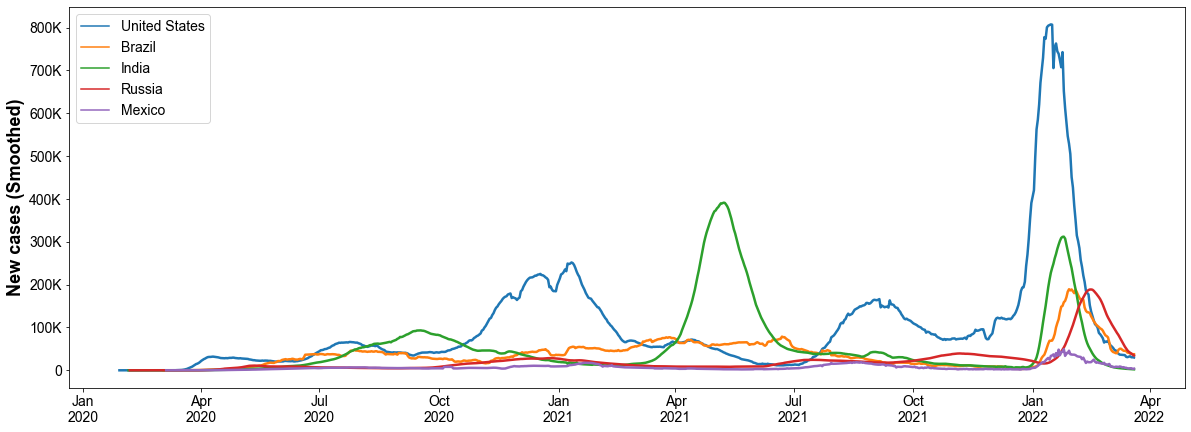

In [24]:
fig, ax = plt.subplots(figsize=(20,7))

fig.patch.set_alpha(0)

sns.lineplot(data=df, x='date', y='new_cases_smoothed', hue='location', linewidth=2.5, ax=ax, hue_order=['United States', 'Brazil', 'India', 'Russia', 'Mexico']);
ax.set_xlabel('')
ax.tick_params('both', labelsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('New cases (Smoothed)', weight='bold', fontsize=18)
ax.yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax.xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

plt.savefig("plots/lineplot_newCasesSmoothed_top5Countries.png", transparent=True)

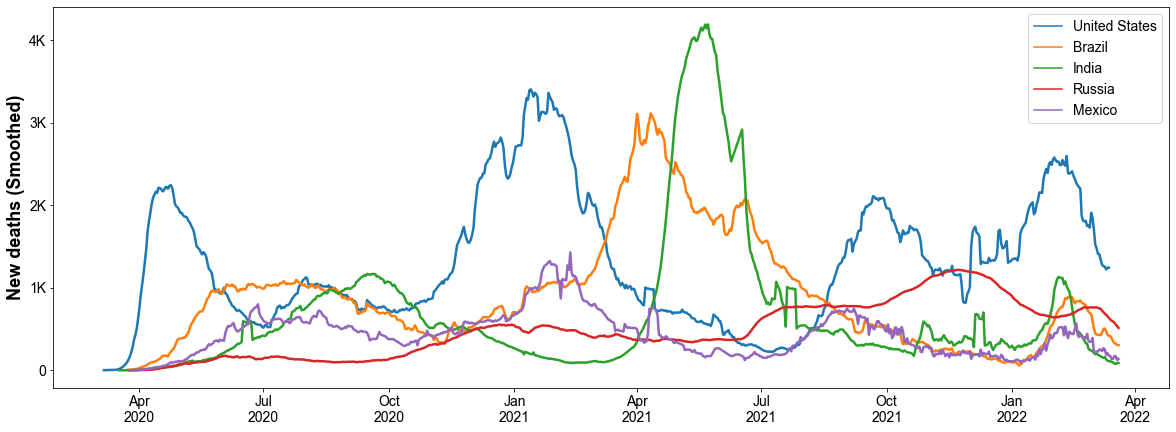

In [25]:
fig, ax = plt.subplots(figsize=(20,7))

fig.patch.set_alpha(0)

sns.lineplot(data=df, x='date', y='new_deaths_smoothed', hue='location', linewidth=2.5, ax=ax, hue_order=['United States', 'Brazil', 'India', 'Russia', 'Mexico']);
ax.set_xlabel('')
ax.tick_params('both', labelsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('New deaths (Smoothed)', weight='bold', fontsize=18)
ax.yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax.xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

plt.savefig("plots/lineplot_newCasesSmoothed_top5Countries.png", transparent=True)

Here we can see that, even though India and Brazil are the second and third countries with most cases, the number of new cases reported for these countries is very far behind those reported in the United States. Still, Brazil is 2nd in terms of deaths caused by COVID-19, even with less than half the total number of cases in the US. When comparing the peaks in new deaths reported, one can identify a decrease in new deaths reported in the most recent peak of new cases.

However, looking at absolute numbers is not always the best way to visualize data. Sometimes, a great number of cases will occur because of the population sizes or other undiscovered factors. An example of this is the fact that the 4th and 5th countries with most cases are not the ones with most deaths at the same ranking. Also, seeing the data in a logarithmic scale allows us to perceive rapid, exponential growth. Let's see how these changes will affect our perception of the data.

### Log-scale

First, let's plot data from the entire World:

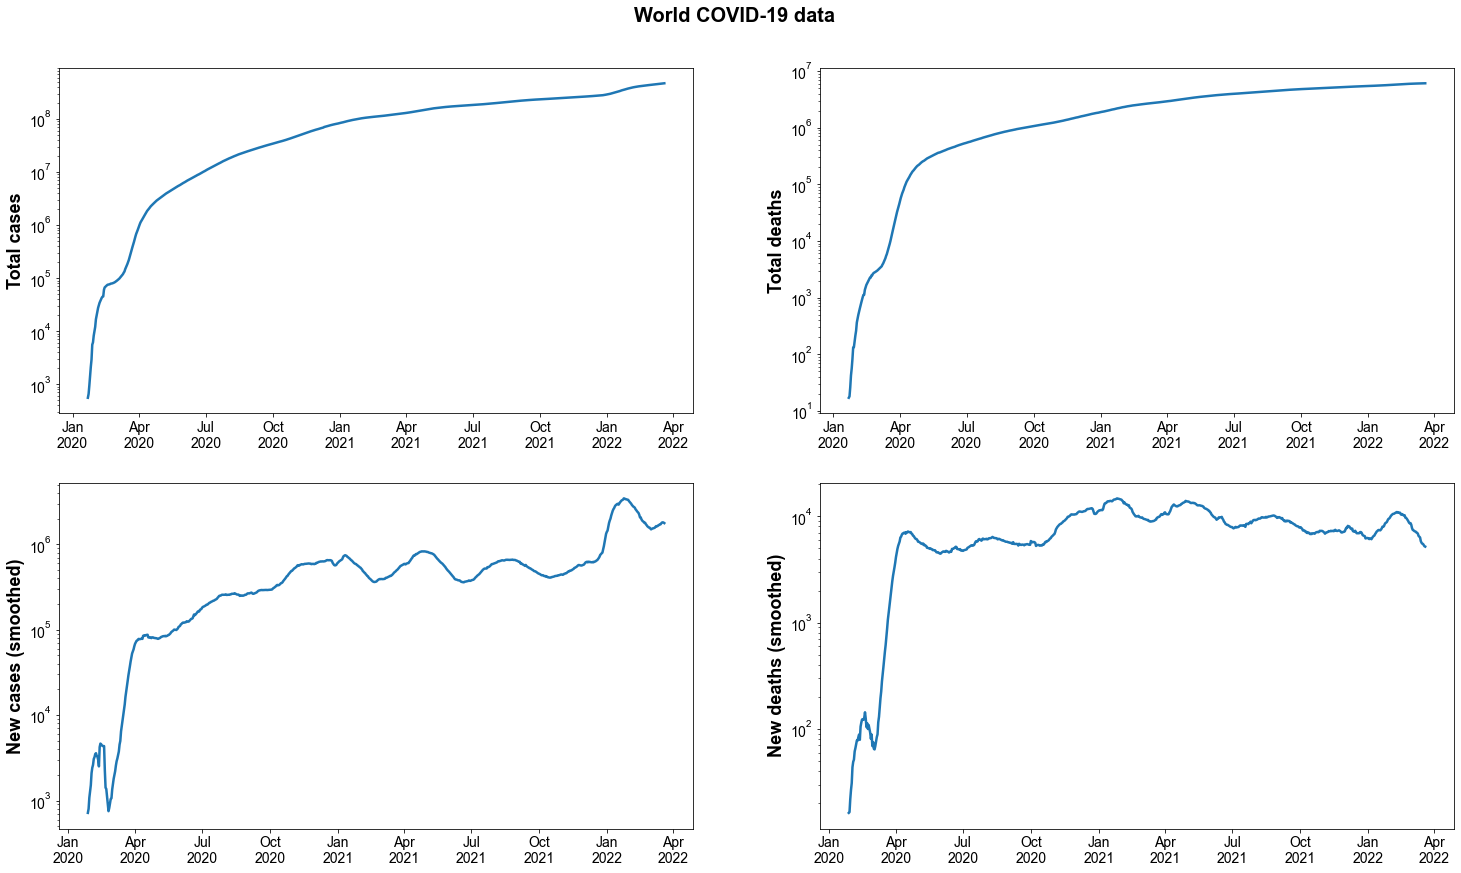

In [26]:
# Plotting line plots
fig, ax = plt.subplots(2, 2, figsize=(25,14))

fig.patch.set_alpha(0)

sns.lineplot(data=df_world, x='date', y='total_cases', linewidth=2.5, ax=ax[0,0]);
ax[0,0].set_xlabel('')
ax[0,0].tick_params('both', labelsize=14)
ax[0,0].set_ylabel('Total cases', weight='bold', fontsize=18)
ax[0,0].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[0,0].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

sns.lineplot(data=df_world, x='date', y='total_deaths', linewidth=2.5, ax=ax[0,1]);
ax[0,1].set_xlabel('')
ax[0,1].tick_params('both', labelsize=14)
ax[0,1].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[0,1].set_ylabel('Total deaths', weight='bold', fontsize=18)
ax[0,1].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

sns.lineplot(data=df_world, x='date', y='new_cases_smoothed', linewidth=2.5, ax=ax[1,0]);
ax[1,0].set_xlabel('')
ax[1,0].tick_params('both', labelsize=14)
ax[1,0].set_ylabel('New cases (smoothed)', weight='bold', fontsize=18)
ax[1,0].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[1,0].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

sns.lineplot(data=df_world, x='date', y='new_deaths_smoothed', linewidth=2.5, ax=ax[1,1]);
ax[1,1].set_xlabel('')
ax[1,1].tick_params('both', labelsize=14)
ax[1,1].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[1,1].set_ylabel('New deaths (smoothed)', weight='bold', fontsize=18)
ax[1,1].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

fig.suptitle('World COVID-19 data', fontsize=20, weight='bold', y=0.94)

plt.savefig("plots/lineplot_world(log).png", transparent=True)

Now we plot new cases by continent:

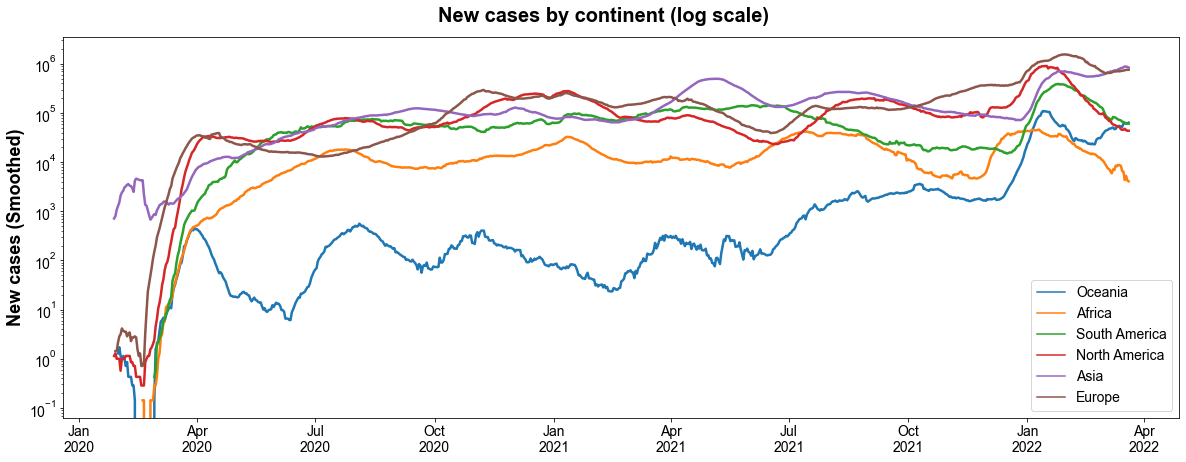

In [27]:
# Plotting lineplot
fig, ax = plt.subplots(figsize=(20,7))

fig.patch.set_alpha(0)

sns.lineplot(data=df_continent, x='date', y='new_cases_smoothed', hue='location', linewidth=2.5, ax=ax, hue_order=['Oceania','Africa','South America','North America', 'Asia', 'Europe']);
ax.set_xlabel('')
ax.tick_params('both', labelsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('New cases (Smoothed)', weight='bold', fontsize=18)
ax.yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax.xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

ax.set_yscale('log')

fig.suptitle('New cases by continent (log scale)', fontsize=20, weight='bold', y=0.94)

plt.savefig("plots/lineplot_newCasesSmoothed_continent(log).png", transparent=True)

And new cases by country:

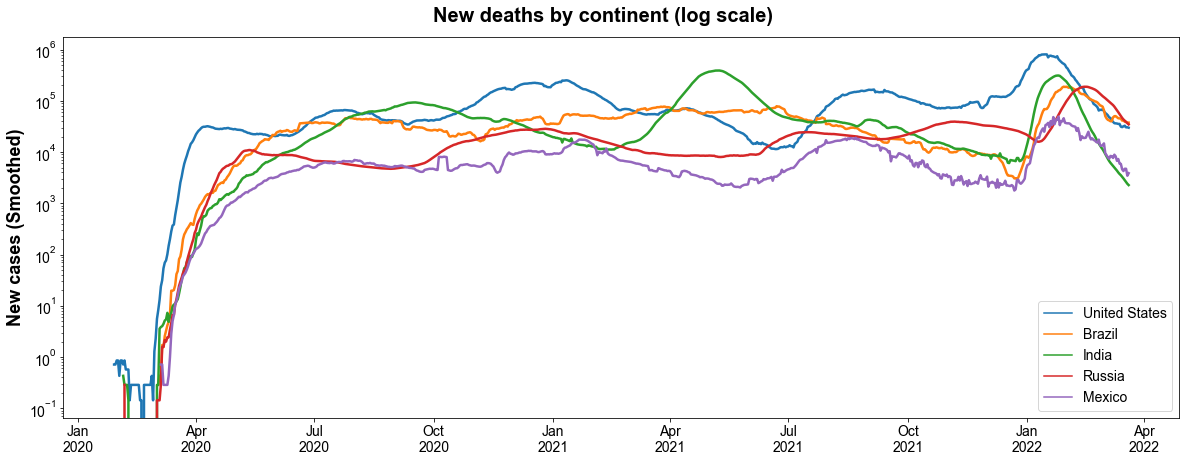

In [28]:
fig, ax = plt.subplots(figsize=(20,7))

fig.patch.set_alpha(0)

sns.lineplot(data=df, x='date', y='new_cases_smoothed', hue='location', linewidth=2.5, ax=ax, hue_order=['United States', 'Brazil', 'India', 'Russia', 'Mexico']);
ax.set_xlabel('')
ax.tick_params('both', labelsize=14)
ax.legend(fontsize=14)
ax.set_ylabel('New cases (Smoothed)', weight='bold', fontsize=18)
ax.yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax.xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

ax.set_yscale('log')

fig.suptitle('New deaths by continent (log scale)', fontsize=20, weight='bold', y=0.94)

plt.savefig("plots/lineplot_newCasesSmoothed_top5Countries(log).png", transparent=True)

Looking at these plots in the log scale, we can see that, overall, the number of total cases, new cases, total deaths and new deaths seem to have been stabilising, until the appearance of the new variant, Omicron, which caused new peaks to arise.

### COVID-19, per million

To look at *per million* data, we first subset the data again now taking the top 5 countries with most deaths/cases per million.

In [29]:
# 5 countries with most deaths per million up until 2022-03-20
top5MostDeaths_countries_perMillion = df.loc[df.date == "2022-03-20"].sort_values(by="total_deaths_per_million", ascending=False).head(5)
top5MostDeaths_countries_perMillion.location = [location.replace(' ', '\n') for location in top5MostDeaths_countries_perMillion.location]

# 5 countries with most cases per million up until 2022-03-20
top5MostCases_countries_perMillion = df.loc[df.date == "2022-03-20"].sort_values(by="total_cases_per_million", ascending=False).head(5)
top5MostCases_countries_perMillion.location = [location.replace(' ', '\n') for location in top5MostCases_countries_perMillion.location]

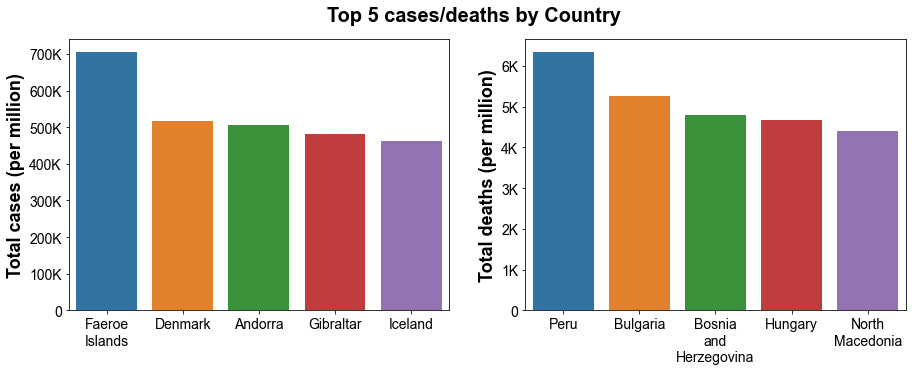

In [30]:
# plotting bar plot of top5 most deaths and cases
fig, ax = plt.subplots(1, 2, figsize=(15,5))

fig.patch.set_alpha(0)

sns.barplot(data=top5MostCases_countries_perMillion, x='location', y='total_cases_per_million', ax=ax[0])
ax[0].set_xlabel('')
ax[0].tick_params('both', labelsize=14)
ax[0].set_ylabel('Total cases (per million)', weight='bold', fontsize=18)
ax[0].yaxis.set_major_formatter(tools.reformat_large_tick_values);

sns.barplot(data=top5MostDeaths_countries_perMillion, x='location', y='total_deaths_per_million', ax=ax[1])
ax[1].set_xlabel('')
ax[1].tick_params('both', labelsize=14)
ax[1].set_ylabel('Total deaths (per million)', weight='bold', fontsize=18)
ax[1].yaxis.set_major_formatter(tools.reformat_large_tick_values);

fig.suptitle('Top 5 cases/deaths by Country', fontsize=20, weight='bold', y=0.97)

plt.xticks(wrap=True)
plt.savefig("plots/total_cases_deaths_top5Countries_perMillion.png", transparent=True)

Looking at the proportional number of total cases and deaths (per million), we can see that they are very different from the absolute numbers. This indicates a greater burden of the disease in these countries, in relation to their population sizes.

## Analysing data from Brazil

To begin looking at data from Brazil, we first subset de dataframe:

In [31]:
# getting data from Brazil only
df_brazil = df.loc[df.location == "Brazil"].copy()

Now, let's see how the number of cases and deaths have evolved in Brazil during the pandemic.

In [32]:
# when was the first case reported?
print(df_brazil.date.min())

2020-02-26 00:00:00


In [33]:
# when was the first death registered?
print(df_brazil[df_brazil['new_deaths'].notna()].date.min())

2020-03-17 00:00:00


From these, we can see that the first death was reported almost one month after the first case was registered in Brazil, and over three months after the first case was reported worldwide.

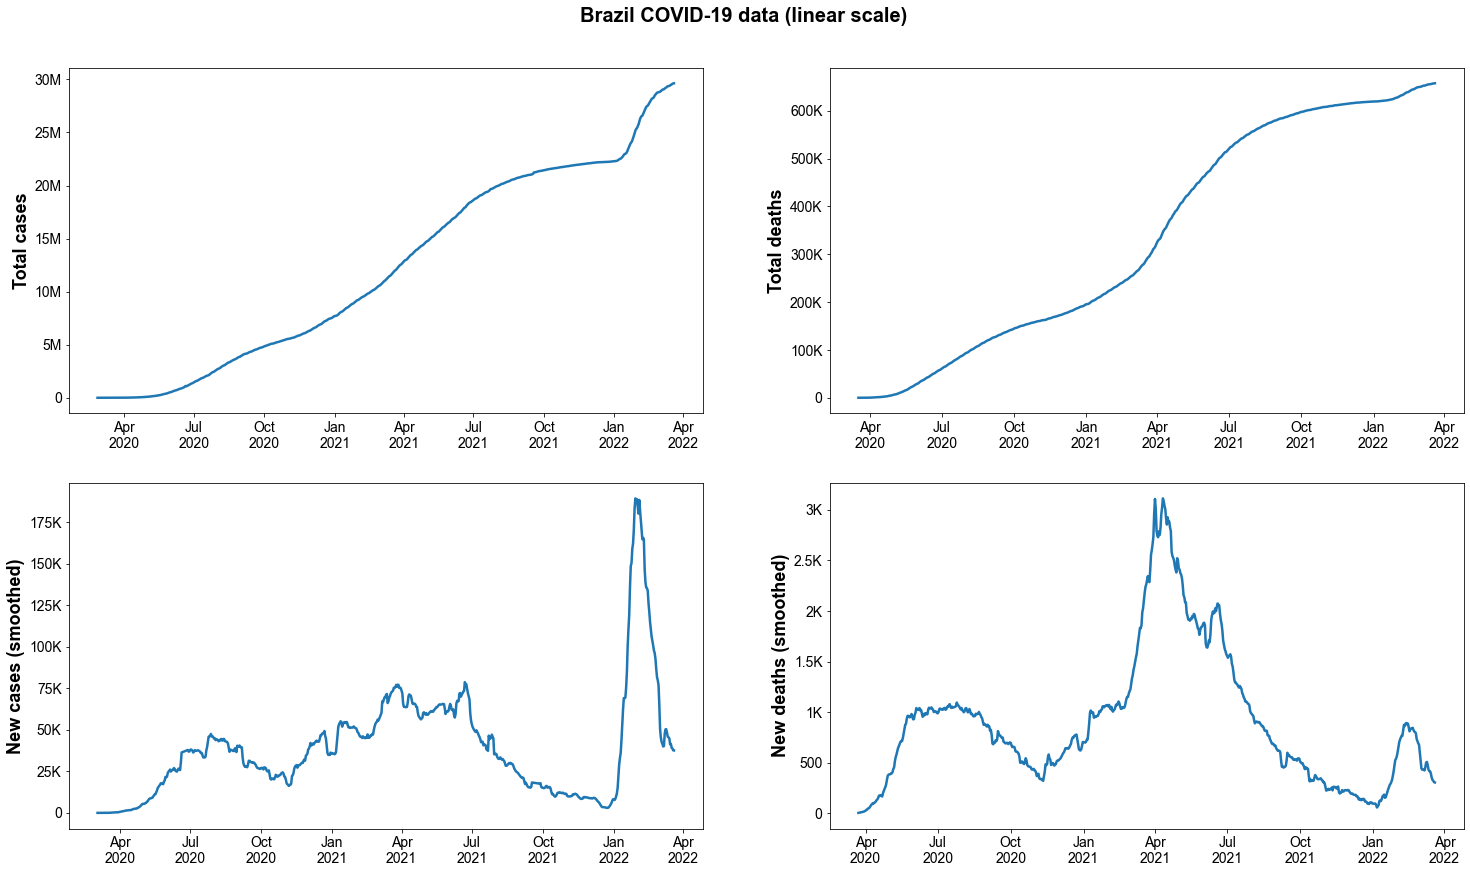

In [34]:
# Plotting line plots
fig, ax = plt.subplots(2, 2, figsize=(25,14))

fig.patch.set_alpha(0)

sns.lineplot(data=df_brazil, x='date', y='total_cases', linewidth=2.5, ax=ax[0,0]);
ax[0,0].set_xlabel('')
ax[0,0].tick_params('both', labelsize=14)
ax[0,0].set_ylabel('Total cases', weight='bold', fontsize=18)
ax[0,0].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[0,0].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

sns.lineplot(data=df_brazil, x='date', y='total_deaths', linewidth=2.5, ax=ax[0,1]);
ax[0,1].set_xlabel('')
ax[0,1].tick_params('both', labelsize=14)
ax[0,1].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[0,1].set_ylabel('Total deaths', weight='bold', fontsize=18)
ax[0,1].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

sns.lineplot(data=df_brazil, x='date', y='new_cases_smoothed', linewidth=2.5, ax=ax[1,0]);
ax[1,0].set_xlabel('')
ax[1,0].tick_params('both', labelsize=14)
ax[1,0].set_ylabel('New cases (smoothed)', weight='bold', fontsize=18)
ax[1,0].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[1,0].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

sns.lineplot(data=df_brazil, x='date', y='new_deaths_smoothed', linewidth=2.5, ax=ax[1,1]);
ax[1,1].set_xlabel('')
ax[1,1].tick_params('both', labelsize=14)
ax[1,1].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[1,1].set_ylabel('New deaths (smoothed)', weight='bold', fontsize=18)
ax[1,1].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));

fig.suptitle('Brazil COVID-19 data (linear scale)', fontsize=20, weight='bold', y=0.94)

plt.savefig("plots/lineplot_brazil.png", transparent=True)

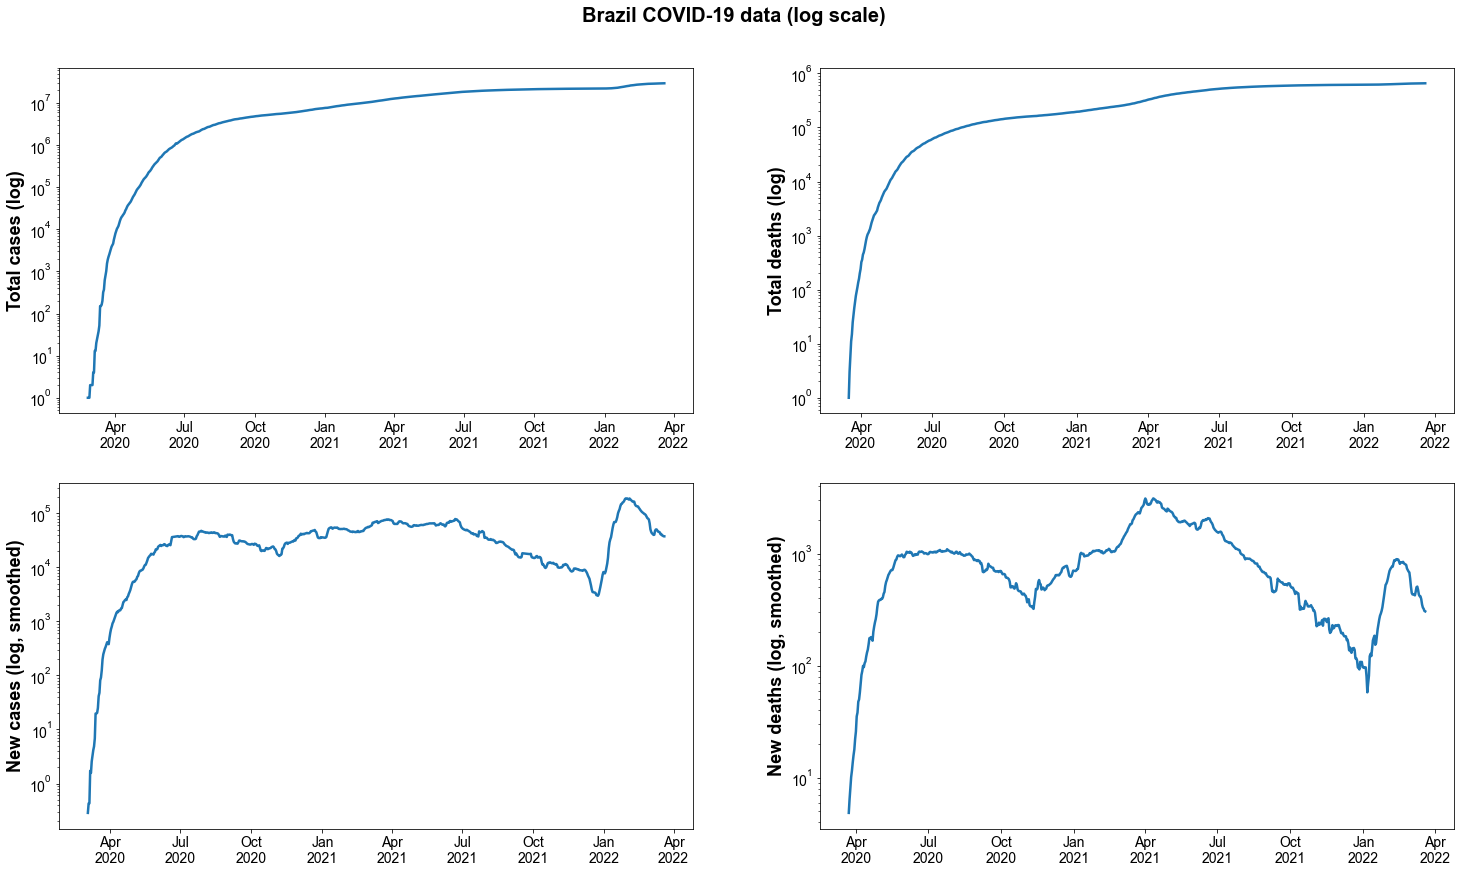

In [35]:
# Plotting line plots
fig, ax = plt.subplots(2, 2, figsize=(25,14))

fig.patch.set_alpha(0)

sns.lineplot(data=df_brazil, x='date', y='total_cases', linewidth=2.5, ax=ax[0,0]);
ax[0,0].set_xlabel('')
ax[0,0].tick_params('both', labelsize=14)
ax[0,0].set_ylabel('Total cases (log)', weight='bold', fontsize=18)
ax[0,0].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[0,0].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));
ax[0,0].set_yscale('log')

sns.lineplot(data=df_brazil, x='date', y='total_deaths', linewidth=2.5, ax=ax[0,1]);
ax[0,1].set_xlabel('')
ax[0,1].tick_params('both', labelsize=14)
ax[0,1].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[0,1].set_ylabel('Total deaths (log)', weight='bold', fontsize=18)
ax[0,1].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));
ax[0,1].set_yscale('log')

sns.lineplot(data=df_brazil, x='date', y='new_cases_smoothed', linewidth=2.5, ax=ax[1,0]);
ax[1,0].set_xlabel('')
ax[1,0].tick_params('both', labelsize=14)
ax[1,0].set_ylabel('New cases (log, smoothed)', weight='bold', fontsize=18)
ax[1,0].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[1,0].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));
ax[1,0].set_yscale('log')

sns.lineplot(data=df_brazil, x='date', y='new_deaths_smoothed', linewidth=2.5, ax=ax[1,1]);
ax[1,1].set_xlabel('')
ax[1,1].tick_params('both', labelsize=14)
ax[1,1].yaxis.set_major_formatter(tools.reformat_large_tick_values)
ax[1,1].set_ylabel('New deaths (log, smoothed)', weight='bold', fontsize=18)
ax[1,1].xaxis.set_major_formatter(DateFormatter('%b\n%Y'));
ax[1,1].set_yscale('log')

fig.suptitle('Brazil COVID-19 data (log scale)', fontsize=20, weight='bold', y=0.94)

plt.savefig("plots/lineplot_brazil_log.png", transparent=True)

When we look at the linear scale lineplots, we can identify peaks of increase in total and new cases/deaths that are consistent with the appearance of the new variants. We also see, in the log scale, that overall the rate at which total cases and deaths increased has diminished. The number of new cases/deaths started decreasing, until the arrival of the Omicron variant earlier this year (2022). 

## Conclusion

Overall...